<a href="https://colab.research.google.com/github/Revan-Bairav/Machine-Learning-algorithms/blob/main/lin_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving Real estate.csv to Real estate.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import io

In [ ]:
rest=pd.read_csv("/content/Real estate.csv")

In [ ]:
rest.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
rest.shape

(414, 8)

In [ ]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
rest.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


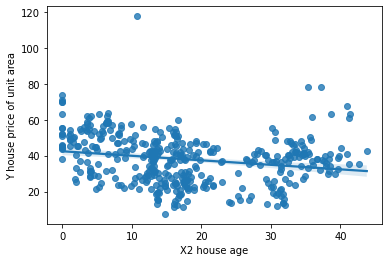

In [ ]:
sns.regplot(x='X2 house age', y='Y house price of unit area', data=rest)

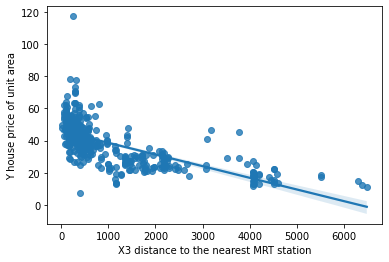

In [ ]:
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=rest)

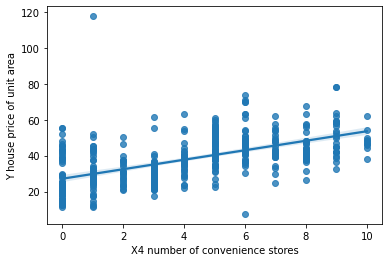

In [ ]:
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=rest)

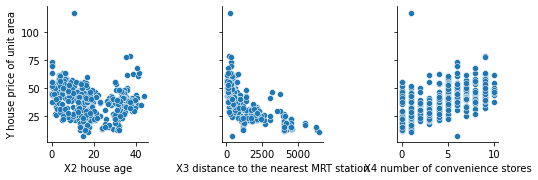

In [ ]:
sns.pairplot(data=rest, x_vars=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores'], y_vars='Y house price of unit area')

In [ ]:
rest.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


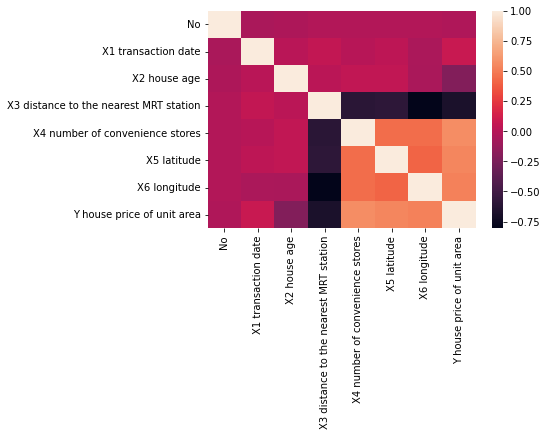

In [ ]:
sns.heatmap(rest.corr())

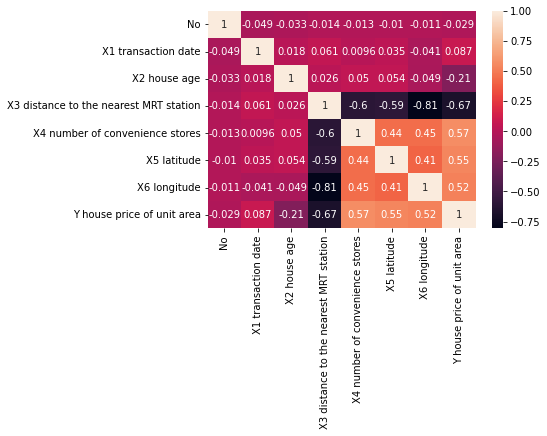

In [ ]:
sns.heatmap(rest.corr(), annot=True)

In [ ]:
X=rest['X2 house age']
y=rest['Y house price of unit area']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,X2 house age
287,1.0,19.2
31,1.0,29.6
209,1.0,34.8
239,1.0,18.1
47,1.0,35.9


In [ ]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const           42.574559
X2 house age    -0.270250
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.048
Model:                                    OLS   Adj. R-squared:                  0.045
Method:                         Least Squares   F-statistic:                     14.47
Date:                        Fri, 03 Feb 2023   Prob (F-statistic):           0.000174
Time:                                10:54:56   Log-Likelihood:                -1171.1
No. Observations:                         289   AIC:                             2346.
Df Residuals:                             287   BIC:                             2354.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.5746      1.534     27.757      0.000      39.556      45.593
X2 house age    -0.2702      0.071     -3.804      0.000      -0.410      -0.130
==============================================================================
Omnibus:                       47.008   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.957
Skew:                           0.747   Prob(JB):                     2.00e-27
Kurtosis:                       5.825   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

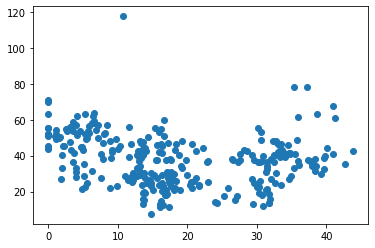

In [ ]:
plt.scatter(X_train, y_train)

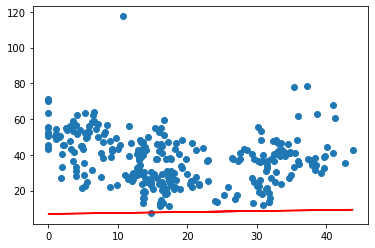

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train,'r')
plt.show()

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

287    37.385768
31     34.575172
209    33.169875
239    37.683042
47     32.872600
         ...    
343    33.521199
359    41.061162
323    34.845422
280    41.952985
8      34.007648
Length: 289, dtype: float64

In [ ]:
residual=y_train-y_train_pred
residual

287    -4.485768
31     -9.575172
209     7.730125
239    -7.983042
47     28.627400
         ...    
343    13.078801
359   -16.361162
323     7.654578
280     3.447015
8     -15.207648
Length: 289, dtype: float64

<Figure size 432x288 with 0 Axes>

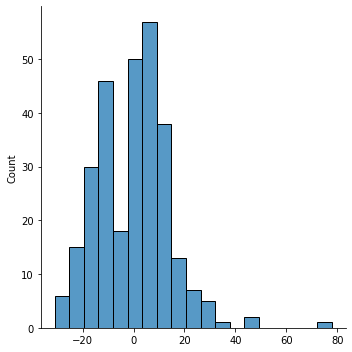

In [ ]:
plt.figure()
sns.displot(residual)

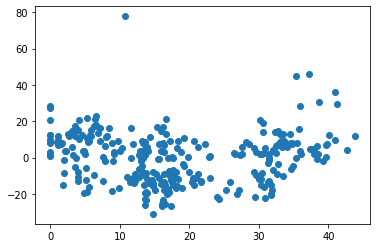

In [ ]:
plt.scatter(X_train, residual)
plt.show()